<h1 style="background-color: #f8f0fa;
            border-left: 5px solid #1b4332;
            font-family: 'Trebuchet MS', sans-serif;
            border-right: 5px solid #1b4332;
            padding: 12px;
            border-radius: 50px 50px;
            color: #1b4332;
            text-align:center;
            font-size:45px;"><strong>😊Hierarchical Clustering Algorithm🌟</strong></h1>
<hr style="border-top: 5px solid #264653;">

# Hierarchical Clustering

## What is Hierarchical Clustering?
Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters. It can be categorized into two main types:

1. **Agglomerative** (bottom-up approach): Starts with individual data points as clusters and merges them iteratively.
2. **Divisive** (top-down approach): Starts with all data points in one cluster and splits them iteratively.

The most common is **Agglomerative Hierarchical Clustering**.

---

## Steps for Hierarchical Clustering

### 1. **Prepare the Data**
- Have your dataset ready, ideally with numerical features.
- Normalize the data to bring all features to the same scale.

### 2. **Calculate a Distance Matrix**
- Compute pairwise distances between all data points using a metric like Euclidean distance, Manhattan distance, etc.

### 3. **Choose a Linkage Method**
Decide how to measure the distance between clusters:
- **Single Linkage**: Distance between the closest points of two clusters.
- **Complete Linkage**: Distance between the farthest points of two clusters.
- **Average Linkage**: Average distance between all points in two clusters.
- **Ward's Method**: Minimizes the variance within clusters.

### 4. **Build the Dendrogram**
- Start with each data point as its own cluster.
- Merge the two closest clusters iteratively until all points are in one cluster.
- Visualize the process using a dendrogram (a tree-like diagram).

### 5. **Decide the Number of Clusters**
- Cut the dendrogram at the desired level to form clusters.
- Choose the level based on the dataset or specific criteria (like the longest vertical distance in the dendrogram).


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Create a small dataset for demonstration
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual Income ($)': [15, 16, 17, 20, 24, 25, 30, 40, 50, 60],
    'Spending Score': [80, 77, 70, 65, 59, 55, 50, 42, 30, 20]
}
df = pd.DataFrame(data)
df


,CustomerID,Annual Income ($),Spending Score
0,1,15,80
1,2,16,77
2,3,17,70
3,4,20,65
4,5,24,59
5,6,25,55
6,7,30,50
7,8,40,42
8,9,50,30
9,10,60,20


In [2]:

# Step 3: Prepare the Data
# Select features for clustering
X = df[['Annual Income ($)', 'Spending Score']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-1.00250837,  1.34822989],
       [-0.93431052,  1.18772633],
       [-0.86611267,  0.81321803],
       [-0.66151913,  0.5457121 ],
       [-0.38872773,  0.22470498],
       [-0.32052989,  0.01070024],
       [ 0.02045935, -0.25680569],
       [ 0.70243783, -0.68481518],
       [ 1.38441631, -1.32682942],
       [ 2.06639479, -1.86184128]])

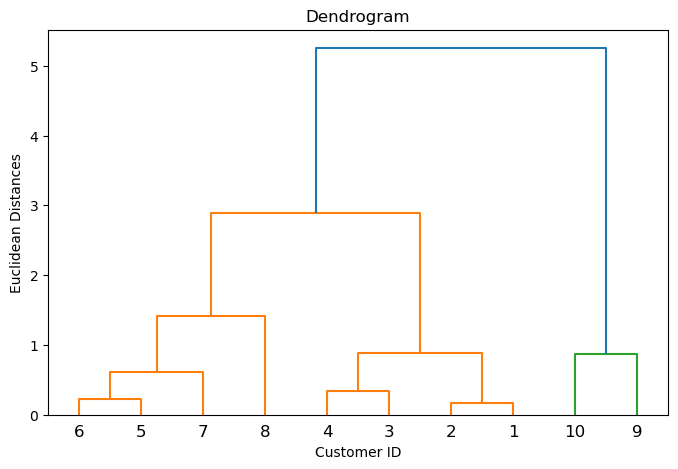

In [3]:

# Step 4: Perform Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linked, labels=df['CustomerID'].values, orientation='top', distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Customer ID')
plt.ylabel('Euclidean Distances')
plt.show()


In [4]:

# Step 5: Decide the Number of Clusters
clusters = fcluster(linked, t=3, criterion='maxclust')
df['Cluster'] = clusters
df


,CustomerID,Annual Income ($),Spending Score,Cluster
0,1,15,80,2
1,2,16,77,2
2,3,17,70,2
3,4,20,65,2
4,5,24,59,3
5,6,25,55,3
6,7,30,50,3
7,8,40,42,3
8,9,50,30,1
9,10,60,20,1


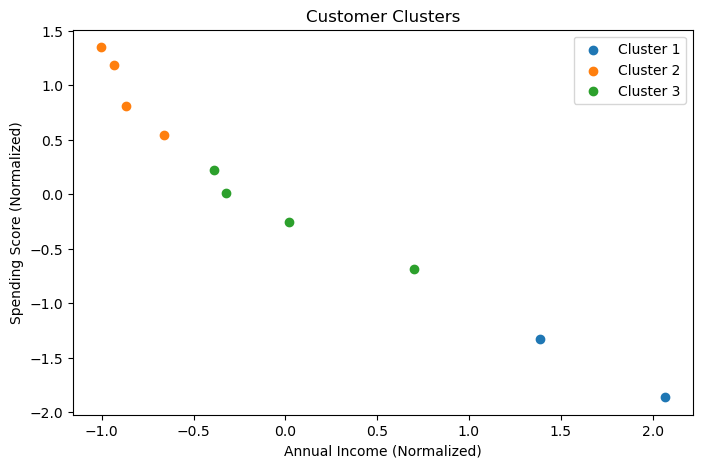

In [11]:

# Step 6: Visualize the Clusters
plt.figure(figsize=(8, 5))
for cluster_id in np.unique(clusters):
    cluster_points = X_scaled[clusters == cluster_id]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        label=f'Cluster {cluster_id}'
    )

plt.title('Customer Clusters')
plt.xlabel('Annual Income (Normalized)')
plt.ylabel('Spending Score (Normalized)')
plt.legend()
plt.show()
